In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Load the dataset
data = pd.read_csv('ecommerce_data.csv')

# Handling data issues (removing extra spaces and converting to numeric)
data['Purchase_Amount'] = data['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Display basic information
print("Original Data Summary:")
print(data.info())

Original Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   float64
 10  Frequency_of_Purchase                  1000 non-nu

In [11]:
# New Feature: Total_Spent (Frequency of Purchase * Purchase Amount)
data['Total_Spent'] = data['Frequency_of_Purchase'] * data['Purchase_Amount']

# Preview the new feature
print("Total_Spent Feature Preview:")
print(data[['Frequency_of_Purchase', 'Purchase_Amount', 'Total_Spent']].head())

Total_Spent Feature Preview:
   Frequency_of_Purchase  Purchase_Amount  Total_Spent
0                      4           333.80      1335.20
1                     11           222.22      2444.42
2                      2           426.22       852.44
3                      6           101.31       607.86
4                      6           211.70      1270.20


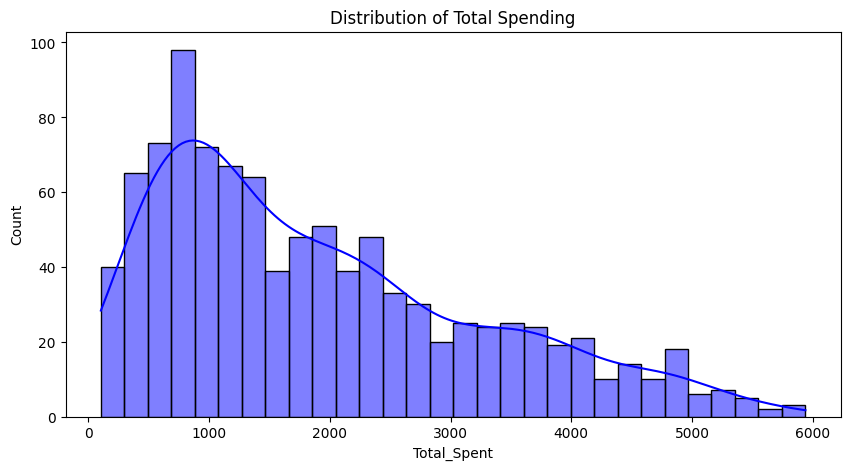

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Total_Spent'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Spending')
plt.show()

In [13]:
scaler = MinMaxScaler()
data['Order_Amount_Scaled'] = scaler.fit_transform(data[['Purchase_Amount']])

# Preview the scaled data
print("Normalized Purchase Amount Preview:")
print(data[['Purchase_Amount', 'Order_Amount_Scaled']].head())

Normalized Purchase Amount Preview:
   Purchase_Amount  Order_Amount_Scaled
0           333.80             0.632434
1           222.22             0.383160
2           426.22             0.838904
3           101.31             0.113042
4           211.70             0.359658


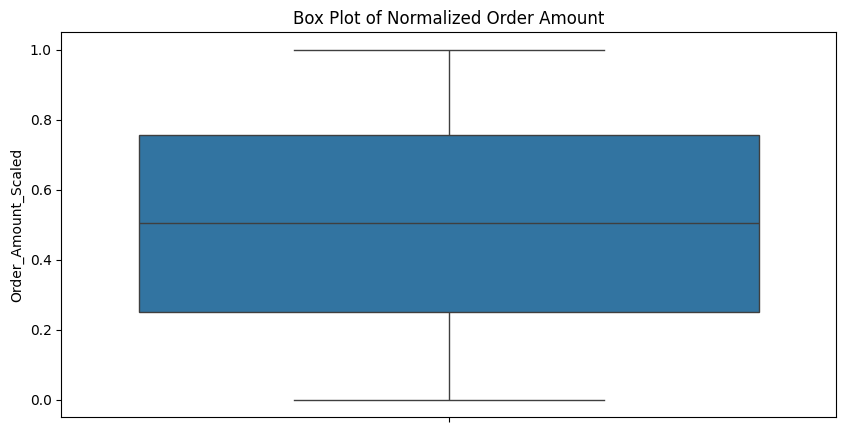

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['Order_Amount_Scaled'])
plt.title('Box Plot of Normalized Order Amount')
plt.show()

In [15]:
standard_scaler = StandardScaler()
data['Age_Standardized'] = standard_scaler.fit_transform(data[['Age']])

# Preview standardized data
print("Standardized Age Preview:")
print(data[['Age', 'Age_Standardized']].head())

Standardized Age Preview:
   Age  Age_Standardized
0   22         -1.316138
1   49          1.572007
2   24         -1.102202
3   29         -0.567360
4   33         -0.139487


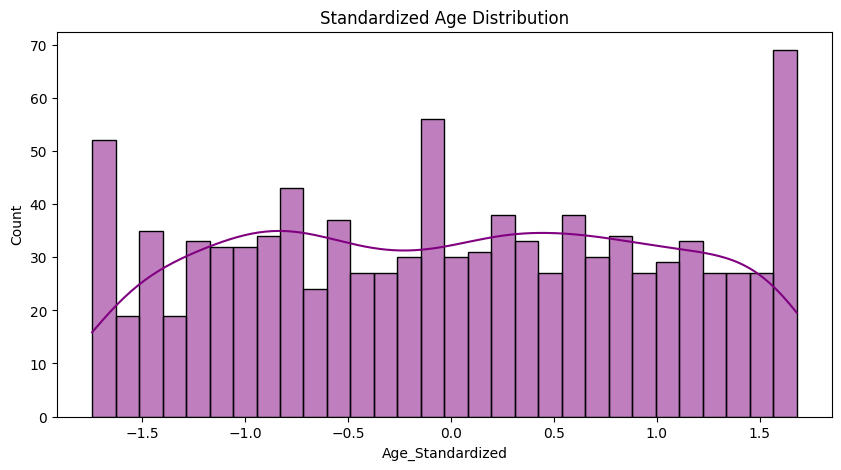

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age_Standardized'], bins=30, kde=True, color='purple')
plt.title('Standardized Age Distribution')
plt.show()

In [17]:
# One-Hot Encoding for Product Category
encoded = pd.get_dummies(data['Purchase_Category'], prefix='Category')

# Merging with the original data
data = pd.concat([data, encoded], axis=1)

# Preview encoded data
print("One-Hot Encoded Product Category Preview:")
print(data.head())

One-Hot Encoded Product Category Preview:
   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category  Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors           333.80  ...   
1       High  Huocheng      Food & Beverages           222.22  ...   
2       High    Huzhen       Office Supplies           426.22  ...   
3     Middle    Wiwilí       Home Appliances           101.31  ...   
4     Middle      Nara             Furniture           211.70  ...   

   Category_Hotels Category_Jewelry & Accessories  Category_Luxury Goods  \
0         

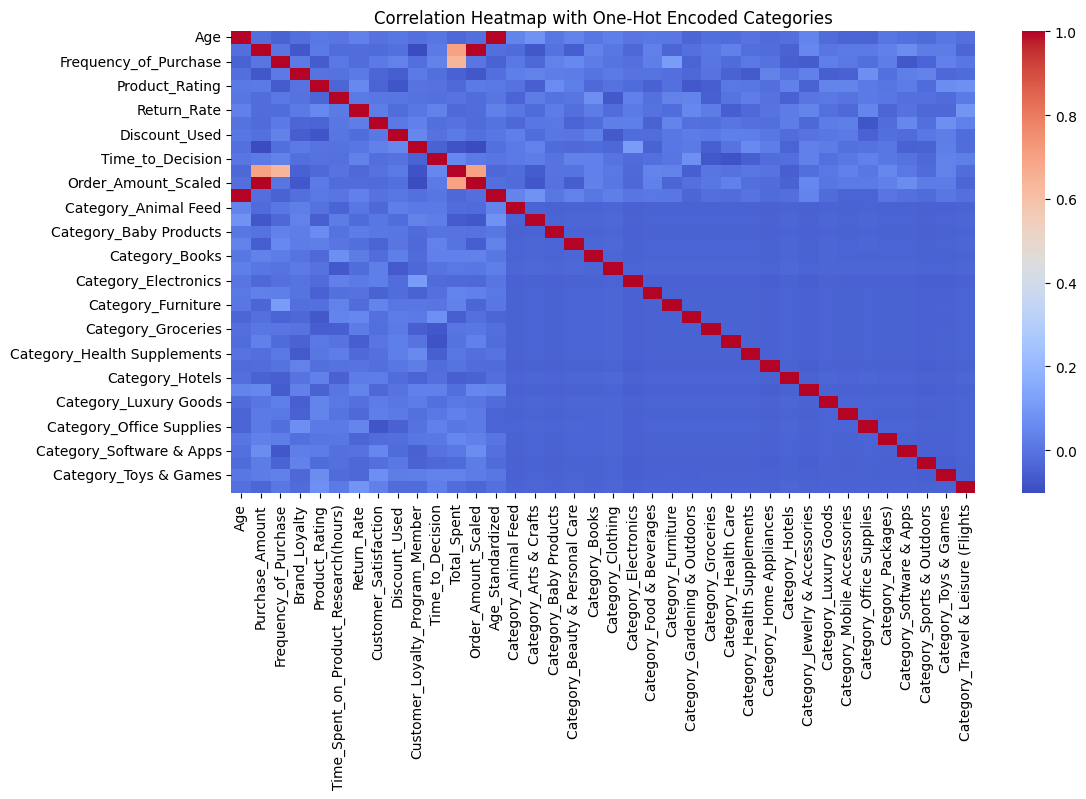

In [18]:
# Heatmap to visualize the correlation of encoded categories with Total_Spent
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap with One-Hot Encoded Categories')
plt.show()

In [19]:
print("Final Transformed Data Summary:")
print(data.head())

Final Transformed Data Summary:
   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category  Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors           333.80  ...   
1       High  Huocheng      Food & Beverages           222.22  ...   
2       High    Huzhen       Office Supplies           426.22  ...   
3     Middle    Wiwilí       Home Appliances           101.31  ...   
4     Middle      Nara             Furniture           211.70  ...   

   Category_Hotels Category_Jewelry & Accessories  Category_Luxury Goods  \
0            False  